In [ ]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
#LOAD DATASET
df = pd.read_csv('/content/BMW sales data (2010-2024) (1) (1).csv')

print("ขนาดข้อมูล (rows, columns):", df.shape)
print("\nชื่อคอลัมน์ทั้งหมด:")
print(df.columns.tolist())

df.head()

ขนาดข้อมูล (rows, columns): (50000, 11)

ชื่อคอลัมน์ทั้งหมด:
['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume', 'Sales_Classification']


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [ ]:
#DATA EXPLORATION
#df.info()
print("\n--- df.info() ---")
print(df.info())

#df.describe()
print("\n--- df.describe() ---")
print(df.describe())

#Class distribution
print("\n--- Sales_Classification value counts ---")
print(df['Sales_Classification'].value_counts())

print("\n--- Sales_Classification proportion ---")
print(df['Sales_Classification'].value_counts(normalize=True))


--- df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB
None

--- df.describe() ---
               Year  Engine_Size_L     Mileage_KM      Price_USD  Sales_Volume
count  50000.000000   50000.000000   500

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector,

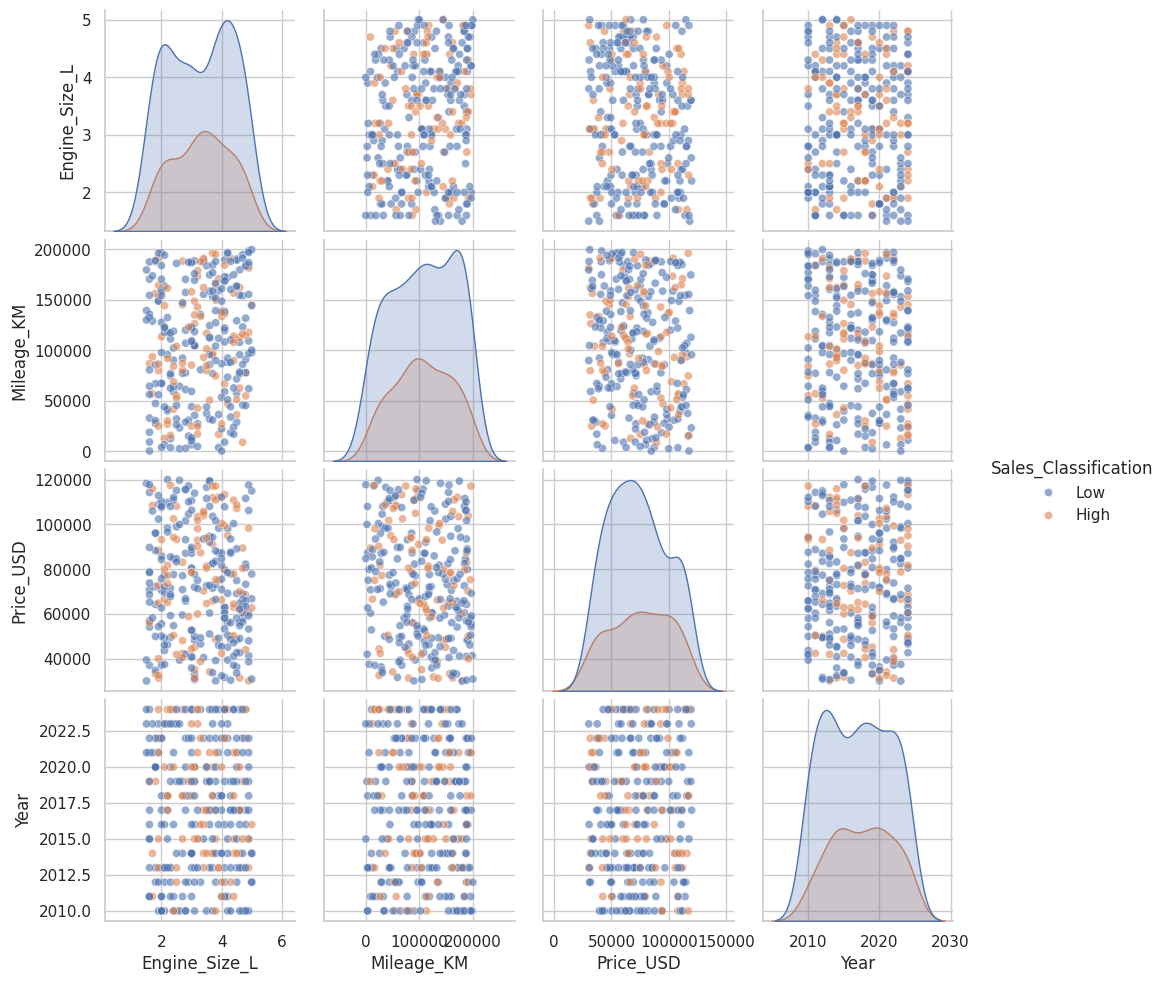

In [ ]:
#Pairplot ที่เลือกเฉพาะฟีเจอร์สำคัญ + ข้อมูลน้อยลง
import seaborn as sns
import matplotlib.pyplot as plt

#เลือกเฉพาะคอลัมน์ตัวเลขที่สัมพันธ์จริงกับ Sales
important_cols = ['Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Year']

#ลดจำนวนแถวเหลือ 300 แถว เพื่อให้กราฟไม่แน่น
df_sample = df.sample(300, random_state=42)

#ตั้งค่า style
sns.set(style="whitegrid")

#วาด pairplot
sns.pairplot(
    df_sample[important_cols + ['Sales_Classification']],
    hue='Sales_Classification',
    diag_kind='kde',
    plot_kws={'alpha':0.6, 's':35},   # ปรับขนาด + ความโปร่งของจุด
    diag_kws={'shade':True}
)

plt.show()

In [ ]:
#MISSING VALUES + CLASS IMBALANCE
print("\n--- Missing values per column ---")
print(df.isna().sum())

print("\n--- Class distribution check ---")
print(df['Sales_Classification'].value_counts())
print(df['Sales_Classification'].value_counts(normalize=True))


--- Missing values per column ---
Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

--- Class distribution check ---
Sales_Classification
Low     34754
High    15246
Name: count, dtype: int64
Sales_Classification
Low     0.69508
High    0.30492
Name: proportion, dtype: float64


In [ ]:
#SPLIT FEATURES & TARGET
y = df['Sales_Classification']
X = df.drop('Sales_Classification', axis=1)

print("ขนาด X:", X.shape)
print("ขนาด y:", y.shape)

ขนาด X: (50000, 10)
ขนาด y: (50000,)


In [ ]:
#PREPROCESSING (Scaler + OneHot)
numeric_features = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']
categorical_features = ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
#TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("\nสัดส่วนของ y_train :")
print(y_train.value_counts(normalize=True))

X_train: (40000, 10)
X_test : (10000, 10)

สัดส่วนของ y_train :
Sales_Classification
Low     0.695075
High    0.304925
Name: proportion, dtype: float64


In [ ]:
#LOGISTIC REGRESSION MODEL
log_reg_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression(
        max_iter=1000,
        class_weight='balanced'
    ))
])

log_reg_model.fit(X_train, y_train)
y_pred_lr = log_reg_model.predict(X_test)

print("\n=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


=== Logistic Regression ===
Accuracy: 0.9942

Classification Report:
              precision    recall  f1-score   support

        High       0.98      1.00      0.99      3049
         Low       1.00      0.99      1.00      6951

    accuracy                           0.99     10000
   macro avg       0.99      1.00      0.99     10000
weighted avg       0.99      0.99      0.99     10000



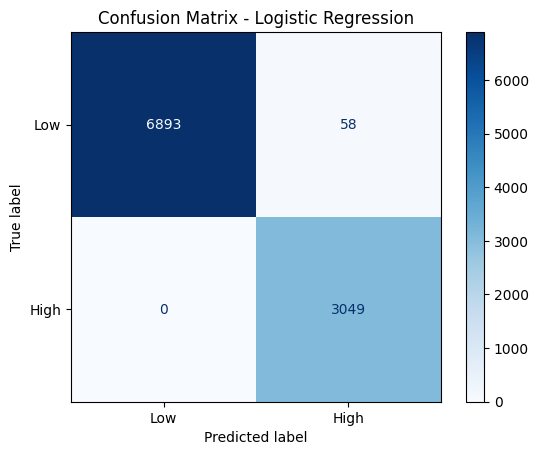

In [ ]:
#Confusion Matrix - Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=['Low', 'High'])
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr,
                                 display_labels=['Low', 'High'])
disp_lr.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [ ]:
#RANDOM FOREST MODEL
rf_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced_subsample'
    ))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


=== Random Forest ===
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      3049
         Low       1.00      1.00      1.00      6951

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



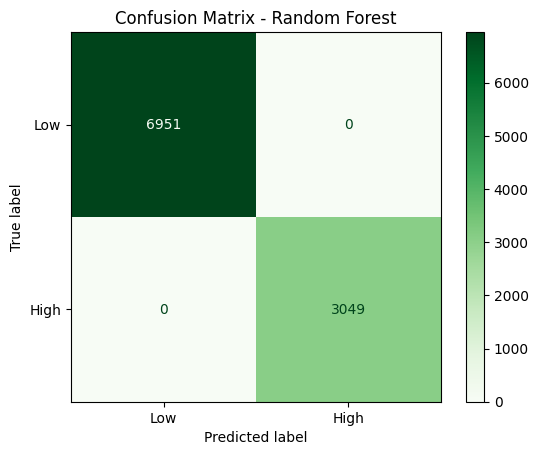

In [ ]:
#Confusion Matrix - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=['Low', 'High'])
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,
                                 display_labels=['Low', 'High'])
disp_rf.plot(cmap='Greens', values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
#Feature Importance - Random Forest
# ดึงค่า importance จากตัวโมเดลใน pipeline
importances = rf_model.named_steps['model'].feature_importances_

#ดึงชื่อฟีเจอร์หลังจาก OneHotEncoding แล้ว
ohe = rf_model.named_steps['preprocess'].named_transformers_['cat']
encoded_cat = ohe.get_feature_names_out(categorical_features)

#รวมชื่อฟีเจอร์ตัวเลข + ฟีเจอร์ที่ถูก one-hot
all_features = numeric_features + list(encoded_cat)

feat_imp = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

#ดู top 15
feat_imp.head(15)

,Feature,Importance
4,Sales_Volume,0.932494
2,Mileage_KM,0.012778
3,Price_USD,0.012760
1,Engine_Size_L,0.009895
0,Year,0.007662
30,Fuel_Type_Hybrid,0.001141
28,Fuel_Type_Diesel,0.001137
31,Fuel_Type_Petrol,0.001135
29,Fuel_Type_Electric,0.001090
32,Transmission_Automatic,0.001085


/tmp/ipython-input-1763909223.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp.head(15), palette='viridis')


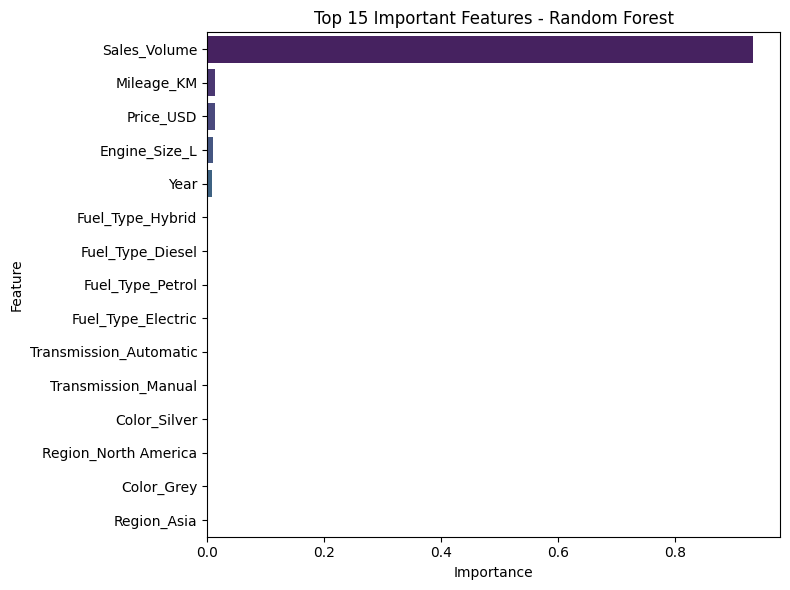

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(15), palette='viridis')
plt.title("Top 15 Important Features - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
#MODEL COMPARISON
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf)
    ]
})

print("\n=== Summary of Model Performance ===")
print(results)


=== Summary of Model Performance ===
                 Model  Accuracy
0  Logistic Regression    0.9942
1        Random Forest    1.0000


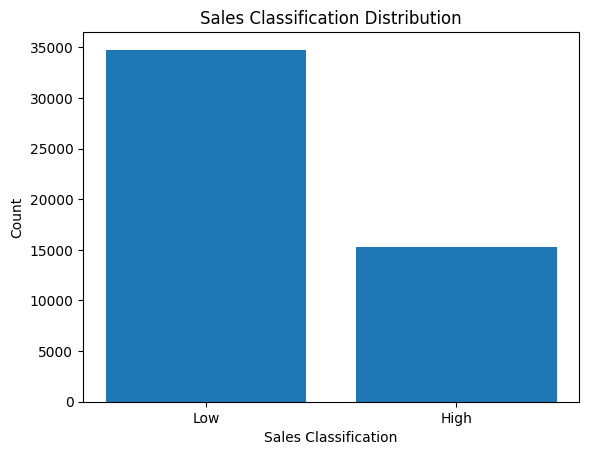

In [ ]:
#VISUALIZATION (BAR & PIE)
counts = df['Sales_Classification'].value_counts()

plt.bar(counts.index, counts.values)
plt.title('Sales Classification Distribution')
plt.xlabel('Sales Classification')
plt.ylabel('Count')
plt.show()

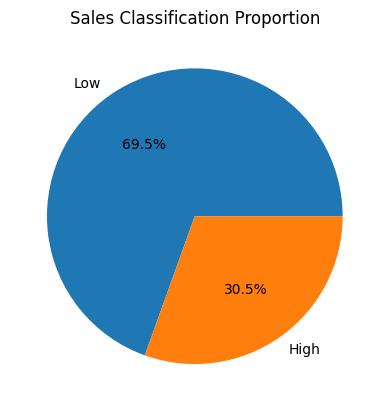

In [ ]:
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title('Sales Classification Proportion')
plt.show()